<a href="https://colab.research.google.com/github/sensiboi/Edunet-Foundation-Shell-Internship/blob/main/Disease_Outbreak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Prediction**

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.


# **About The Dataset**
The sourced dataset includes 16 attributes (Features) and one target variable named class.

1. Age: Age in years ranging from 16 t0 90
2. Gender: Male/Female
3. Polyuria: Yes/No
4. Polydipsia: Yes/No
5. Sudden Weight Loss: Yes/No
6. Weakness: Yes/No
7. Polyphagia: Yes/No
8. Genital Thrush: Yes/No
9. Visual Blurring: Yes/No
10. Itching: Yes/No
11. Irritability: Yes/No
12. Delayed Healing: Yes/No
13. Parial Paresis: Yes/No
14. Muscle Stiffness: Yes/No
15. Alopecia: Yes/No
16. Obesity: Yes/No

Class: Positive/Negative




# **IMPORTING PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [ ]:
Diabetes= pd.read_csv('diabetes_data_upload.csv')

In [ ]:
Diabetes.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [ ]:
Diabetes.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
Diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


# **Exploratory Data Analysis**

In [ ]:
import plotly.express as px


In [ ]:
gendis= px.histogram(Diabetes, x = 'Gender', color = 'class', title="Postive/Negative count Vs Gender")
gendis.show()

In [ ]:
pltbl= ['Gender', 'class']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[pltbl[0]],Diabetes[pltbl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


Female patients have a higher positivity rate than male patients. We can safely conclude that this data set is biased toward female patients with a high positivity rate.

In [ ]:
agehist= px.histogram(Diabetes, x='Age', color="class", title="Distribution of Postive cases with Ages")
agehist.show()

In [ ]:
genbox = px.box(Diabetes, y="Age", x="class", color="Gender", points="all", title= "Age Vs Positive/Negative")
genbox.show()

The median age for the positive rate in men is 53 years old. 16 is the minimum and 85 is the maximum. The age range of 35 to 67 years has a dense population of data points.

The positive rate's median age for females is 47 years old. The minimum and maximum values are 25 and 69 and we can also observe that there is a outlier in the female positive rate at the age of 90 respectively. Based on the box plot, we can fairly estimate that the majority of the positive cases in the dataset are between the ages of 35 and 61.

# **Distribution Of Class**

In [ ]:
clspi = px.pie(Diabetes, values='Age', names='class', title= "Ratio of Positive and Negative cases")
clspi.show()

In [ ]:
print("Count of cases:", Diabetes['class'].value_counts())

Count of cases: class
Positive    320
Negative    200
Name: count, dtype: int64


# **Distribution of Polyuria**

In [ ]:
polyuria=px.histogram(Diabetes, x = 'Polyuria', color = 'class', title="Polyuria")
polyuria.show()

plttbl_polyuria= ['Polyuria', 'class']
pm = sns.light_palette("orange", as_cmap=True)
(round(pd.crosstab(Diabetes[plttbl_polyuria[0]], Diabetes[plttbl_polyuria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = pm)

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


# **Distribution of Polydipsia**

In [ ]:
polydispia = px.histogram(Diabetes, x = 'Polydipsia', color = 'class', title="Increased consumption of water")
polydispia.show()

plttblpolydispia= ['Polydipsia', 'class']
rm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plttblpolydispia[0]], Diabetes[plttblpolydispia[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = rm)

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


# **Distribution of Sudden Weight Loss**

In [ ]:
swl = px.histogram(Diabetes, x = 'sudden weight loss', color = 'class', title="Sudden weight loss")
swl.show()

plttblswl= ['sudden weight loss', 'class']
qm = sns.light_palette("yellow", as_cmap=True)
(round(pd.crosstab(Diabetes[plttblswl[0]], Diabetes[plttblswl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = qm)

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


Due to unexpected weight loss, 58% of individuals are found to have diabetes. Some common illnesses can also be the cause of unexpected weight loss. This is an important feature but not as important as Polyuria or Polydispia.

Distribution of Weakness

In [ ]:
wkns = ['weakness', 'class']
sm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[wkns [0]],Diabetes[wkns [1]], normalize='columns') * 100,2)).style.background_gradient(cmap = sm)

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


# **Distribution Of Polyphagia**

In [ ]:
eating = px.histogram(Diabetes, x = 'Polyphagia', color = 'class', title="Excessive eating")
eating.show()

plt_eating= ['Polyphagia', 'class']
tm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plt_eating[0]], Diabetes[plt_eating[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = tm)

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


With a positive percentage of 59% and a negative percentage of 76%, individuals with an obsessive eating disorder have a lower risk of developing diabetes.

# **Data Preprocessing**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score,confusion_matrix,recall_score,roc_auc_score
%matplotlib inline
from sklearn import model_selection

In [ ]:
number = preprocessing.LabelEncoder()

In [ ]:
dtacpy1 = Diabetes.copy()
dtacpy1.head(5)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
for i in dtacpy1:
    dtacpy1[i] = number.fit_transform(dtacpy1[i])

In [ ]:
dtacpy1.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
X = dtacpy1.drop(['class'],axis=1) # Independent
Y = dtacpy1['class'] # Dependent

In [ ]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
Y.head()

,class
0,1
1,1
2,1
3,1
4,1


Age                   0.106419
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64


<Axes: title={'center': 'Correlation with target variable class'}>

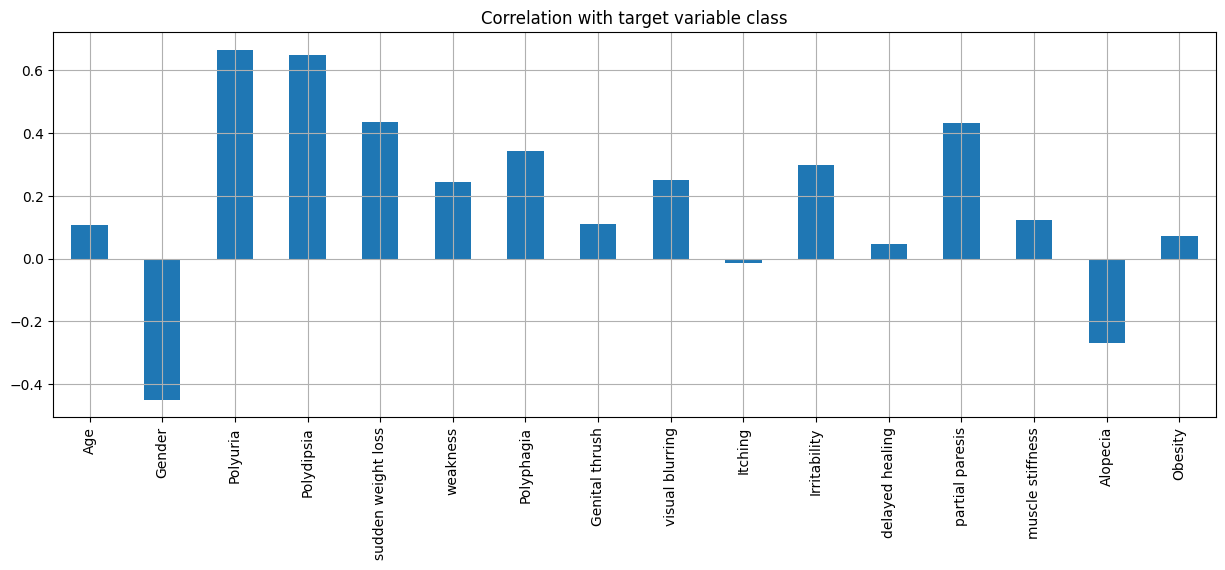

In [ ]:
correlation = X.corrwith(Y)

print(correlation)

correlation.plot.bar(title="Correlation with target variable class", grid=True, figsize=(15,5))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify= Y, random_state = 1000)

In [ ]:
print('Distribution of traget variable in training dataset')
print(Y_train.value_counts())

print('Distribution of traget variable in test dataset')
print(Y_test.value_counts())

Distribution of traget variable in training dataset
class
1    256
0    160
Name: count, dtype: int64
Distribution of traget variable in test dataset
class
1    64
0    40
Name: count, dtype: int64


# **Data Normalization**

In [ ]:
min_max = MinMaxScaler()
X_train[['Age']] = min_max.fit_transform(X_train[['Age']])
X_test[['Age']] = min_max.transform(X_test[['Age']])

In [ ]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
303,0.68,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1
443,0.22,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0
248,0.36,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
109,0.30,0,1,1,0,0,1,0,1,0,1,1,1,1,0,0
198,0.68,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1


## **Model Building**
# **Logistic Regression**

In [ ]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train_LR, y_train_LR)

LogisticRegression()

In [ ]:
predictions_LR = logmodel.predict(X_test_LR)

In [ ]:
final_model_predictions_LR = pd.DataFrame({'Actual':y_test_LR, 'predictions':predictions_LR})

In [ ]:
print(confusion_matrix(y_test_LR, predictions_LR))
print(classification_report(y_test_LR, predictions_LR))
print("----------------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------------")
accuracy_LR=metrics.accuracy_score( final_model_predictions_LR.Actual, final_model_predictions_LR.predictions )*100
accuracy_LR='{:.2f}'.format(accuracy_LR)
print( 'Total Accuracy : ',accuracy_LR)
recall_LR=metrics.recall_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='micro' )
print('recall',recall_LR)
Precision_LR=metrics.precision_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='micro' )
print('Precision',Precision_LR)

[[ 48   4]
 [  4 100]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        52
           1       0.96      0.96      0.96       104

    accuracy                           0.95       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.95      0.95      0.95       156

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  94.87
recall 0.9487179487179487
Precision 0.9487179487179487


# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_Tree_Classifier = DecisionTreeClassifier (random_state = 0)

In [ ]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
decision_Tree_Classifier.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred_DT = decision_Tree_Classifier.predict(X_test_DT)

In [ ]:
final_model_predictions_DT = pd.DataFrame({'Actual':y_test_DT, 'predictions':y_pred_DT})

In [ ]:
final_model_predictions_DT.head()

,Actual,predictions
304,1,1
332,0,0
78,1,1
380,1,1
515,1,1


In [ ]:
print(confusion_matrix(y_test_DT, y_pred_DT))
print(classification_report(y_test_DT, y_pred_DT))

[[50  2]
 [ 5 99]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        52
           1       0.98      0.95      0.97       104

    accuracy                           0.96       156
   macro avg       0.94      0.96      0.95       156
weighted avg       0.96      0.96      0.96       156



In [ ]:
accuracy_DT=( metrics.accuracy_score( final_model_predictions_DT.Actual, final_model_predictions_DT.predictions  ))*100
accuracy_DT='{:.2f}'.format(accuracy_DT)
print( 'Total Accuracy : ',accuracy_DT)
recall_DT=metrics.recall_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('recall',recall_DT)
Precision_DT=metrics.precision_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('Precision',Precision_DT)

Total Accuracy :  95.51
recall 0.9551282051282052
Precision 0.9551282051282052


# **Support Vector Classifier**

In [ ]:
X_train_SVC, X_test_SVC, y_train_SVC, y_test_SVC = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.svm import SVC # "Support Vector Classifier"
clfsvm = SVC(kernel='linear')

In [ ]:
clfsvm.fit(X_train_SVC,y_train_SVC)

SVC(kernel='linear')

In [ ]:
y_pred_SVC=clfsvm.predict(X_test_SVC)

In [ ]:
final_model_predictions_SVC = pd.DataFrame({'Actual':y_test_SVC, 'predictions':y_pred_SVC})

In [ ]:
count_misclassified = (y_test_SVC != y_pred_SVC).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_SVC = metrics.accuracy_score(y_test_SVC, y_pred_SVC)
print('Accuracy: {:.2f}'.format(accuracy_SVC))

Misclassified samples: 13
Accuracy: 0.92


In [ ]:
print(confusion_matrix(y_test_SVC, y_pred_SVC))
print(classification_report(y_test_SVC, y_pred_SVC))
print("-----------------------------------------------------------------------------------------------------------------------")

print("-----------------------------------------------------------------------------------------------------------------------")
accuracy_SVC=metrics.accuracy_score( final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions  )*100
accuracy_SVC='{:.2f}'.format(accuracy_SVC)
print( 'Total Accuracy : ',accuracy_SVC)
recall_SVC=metrics.recall_score(final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions,average='micro' )
print('recall',recall_SVC)
Precision_SVC=metrics.precision_score(final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions,average='micro' )
print('Precision',Precision_SVC)

[[47  5]
 [ 8 96]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        52
           1       0.95      0.92      0.94       104

    accuracy                           0.92       156
   macro avg       0.90      0.91      0.91       156
weighted avg       0.92      0.92      0.92       156

-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  91.67
recall 0.9166666666666666
Precision 0.9166666666666666


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
clf = RandomForestClassifier(n_estimators = 500, random_state = 42)

In [ ]:
clf.fit(X_train_RF, y_train_RF)

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
y_pred_RF = clf.predict(X_test_RF)

In [ ]:
final_model_predictions_RF = pd.DataFrame({'Actual':y_test_RF, 'predictions':y_pred_RF})

In [ ]:
final_model_predictions_RF.head()

,Actual,predictions
304,1,1
332,0,0
78,1,1
380,1,1
515,1,1


In [ ]:
y_pred_prob = clf.predict_proba(X_test_RF)

In [ ]:
y_pred_prob = clf.predict_proba(X_test_RF)[:,1]

In [ ]:
final_model_predictions_RF['Predicted_prob'] = y_pred_prob

In [ ]:
final_model_predictions_RF.head()

,Actual,predictions,Predicted_prob
304,1,1,0.972
332,0,0,0.016
78,1,1,1.000
380,1,1,0.962
515,1,1,1.000


In [ ]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

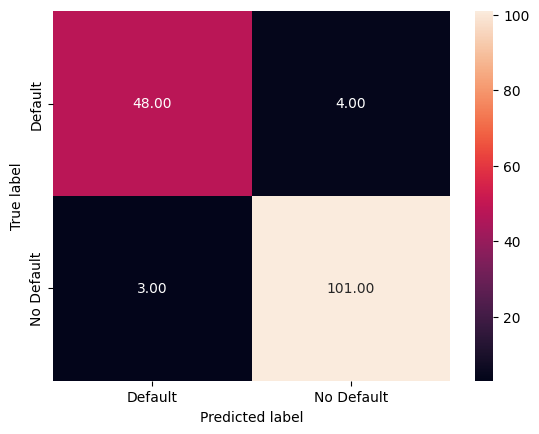

In [ ]:
draw_cm( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )

In [ ]:
accuracy_RF=metrics.accuracy_score( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions  )*100
accuracy_RF='{:.2f}'.format(accuracy_RF)
print( 'Total Accuracy : ',accuracy_RF )
recall_RF=metrics.recall_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )
print('recall :',recall_RF)
precision_RF=metrics.precision_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )
print('Precision :',precision_RF)

Total Accuracy :  95.51
recall : 0.9711538461538461
Precision : 0.9619047619047619


In [ ]:
cm1 = metrics.confusion_matrix( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions)

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Sensitivity :  0.92
Specificity :  0.97


**KNN Algorithm**

In [ ]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train_KNN, y_train_KNN)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred_knn = classifier.predict(X_test_KNN)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_KNN, y_pred_knn))
print(classification_report(y_test_KNN, y_pred_knn))

[[49  3]
 [22 82]]
              precision    recall  f1-score   support

           0       0.69      0.94      0.80        52
           1       0.96      0.79      0.87       104

    accuracy                           0.84       156
   macro avg       0.83      0.87      0.83       156
weighted avg       0.87      0.84      0.84       156



In [ ]:
final_model_predictions_knn = pd.DataFrame({'Actual':y_test_KNN, 'predictions':y_pred_knn})

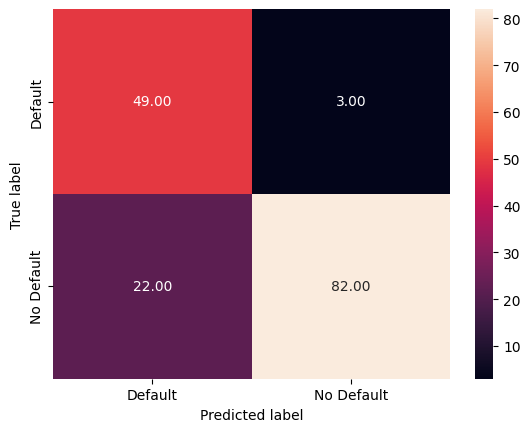

In [ ]:
draw_cm( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )

In [ ]:
accuracy_knn=metrics.accuracy_score( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions)*100
accuracy_knn='{:.2f}'.format(accuracy_knn)
print( 'Total Accuracy : ',accuracy_knn)
recall_knn=metrics.recall_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )
print('recall',recall_knn)
Precision_knn=metrics.precision_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )
print('Precision',Precision_knn)

Total Accuracy :  83.97
recall 0.7884615384615384
Precision 0.9647058823529412


In [ ]:
cm2 = metrics.confusion_matrix( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions)

sensitivity = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', round( specificity, 2 ) )

Sensitivity :  0.94
Specificity :  0.79


In [ ]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_DT,accuracy_SVC,accuracy_LR],
                    "Recall":[recall_RF,recall_knn,recall_DT,recall_SVC,recall_LR],
                    "Precision ":[precision_RF,Precision_knn,Precision_DT,Precision_SVC,Precision_LR]},
                   index=["Random Forest","KNN","Decision Tree Classifier","Support Vector Classifier","Logistic Regression"])
table

,Accuracy,Recall,Precision
Random Forest,95.51,0.971154,0.961905
KNN,83.97,0.788462,0.964706
Decision Tree Classifier,95.51,0.955128,0.955128
Support Vector Classifier,91.67,0.916667,0.916667
Logistic Regression,94.87,0.948718,0.948718


# **Heart Rate Prediction**

A heart attack (myocardial infarction or MI) is a serious medical emergency in which the supply of blood to the heart is suddenly blocked, usually by a blood clot.
A lack of blood to the heart may seriously damage the heart muscle and can be life threatening.

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

**Import the dataset**

In [ ]:
df=pd.read_csv("heart.csv")

1.Age : Age of the patient
2.Sex : Sex of the patient

3.exang: exercise induced angina (1 = yes; 0 = no)

4.ca: number of major vessels (0-3)

5.cp : Chest Pain type chest pain type

Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)

6.chol : cholestoral in mg/dl fetched via BMI sensor

7.fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

8.rest_ecg : resting electrocardiographic results

Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

9.thalach : maximum heart rate achieved

10.target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
new_columns = [ "age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca" , "thal" , "output"]

In [ ]:
df.columns=new_columns

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df["cp"].value_counts()

,count
cp,
0,143
2,87
1,50
3,23


In [ ]:
unique_number=[]
for i in df.columns:
    x=df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number,index=df.columns,columns=["total Unique value"])

,total Unique value
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['output'].value_counts()

,count
output,
1,165
0,138


<Axes: >

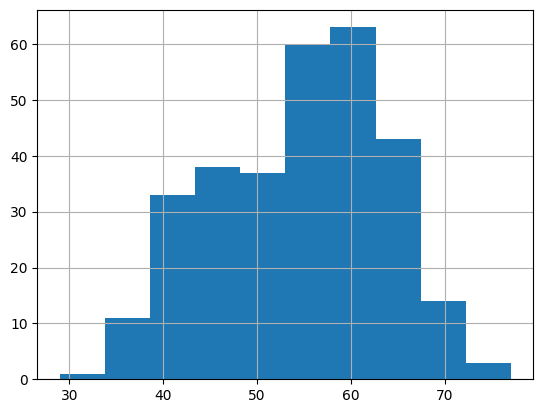

In [ ]:
df['age'].hist()

<Axes: >

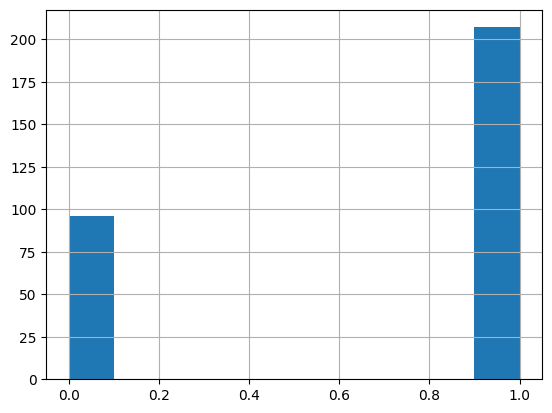

In [ ]:
df['sex'].hist()

<Axes: >

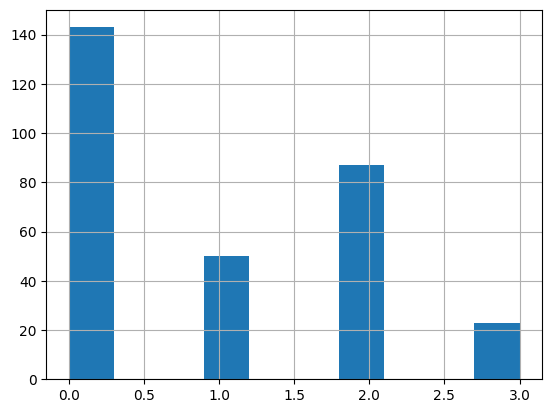

In [ ]:
df['cp'].hist()

<Axes: >

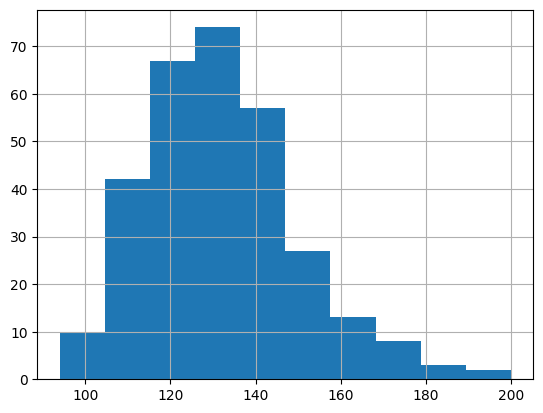

In [ ]:
df['trtbps'].hist()

<Axes: >

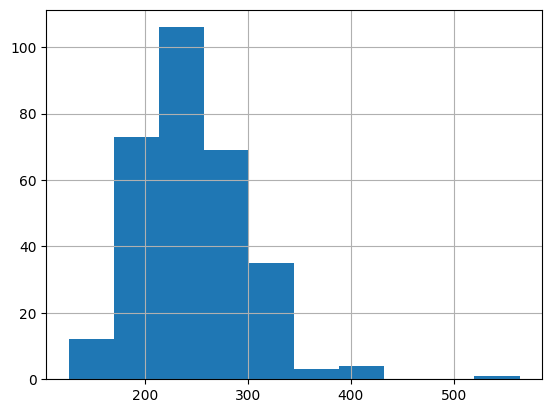

In [ ]:
df['chol'].hist()

<Axes: >

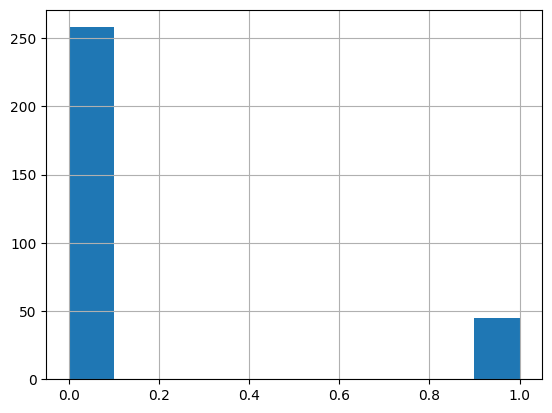

In [ ]:
df['fbs'].hist()

<Axes: >

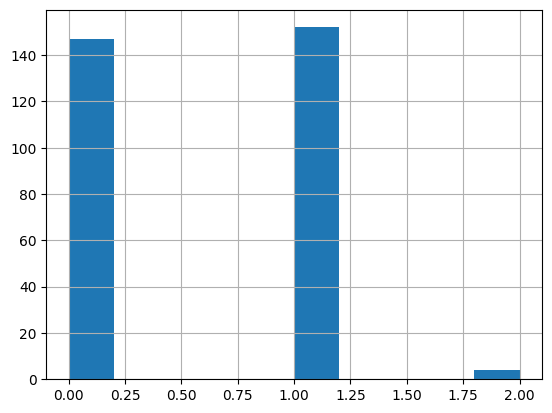

In [ ]:
df['rest_ecg'].hist()

<Axes: >

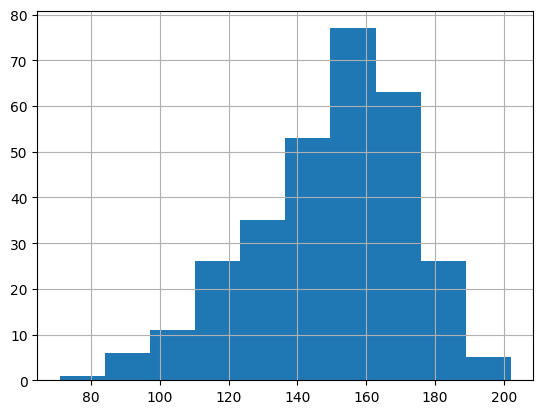

In [ ]:
df['thalach'].hist()

<Axes: >

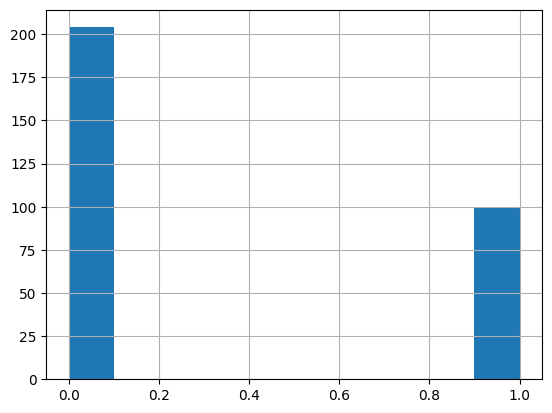

In [ ]:
df['exang'].hist()

<Axes: >

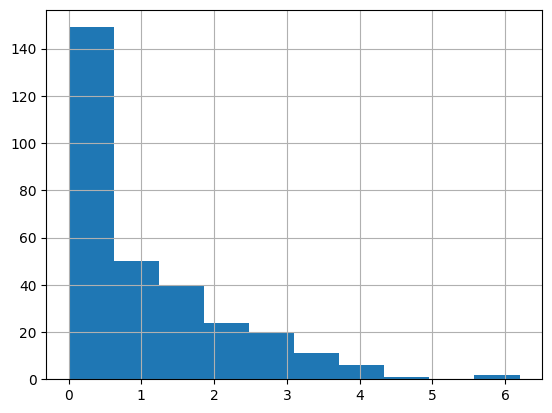

In [ ]:
df['oldpeak'].hist()

<Axes: >

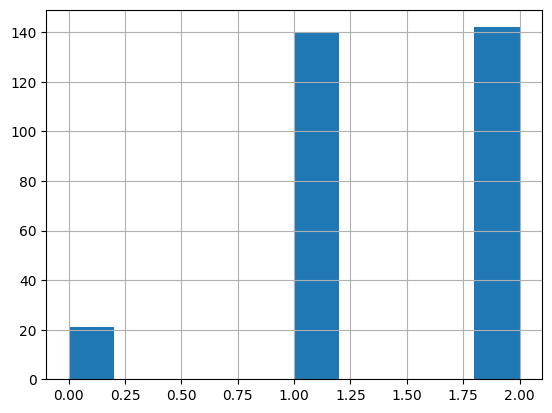

In [ ]:
df['slope'].hist()

<Axes: >

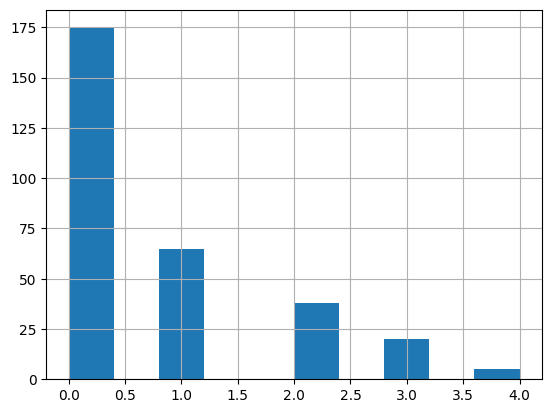

In [ ]:
df['ca'].hist()

<Axes: >

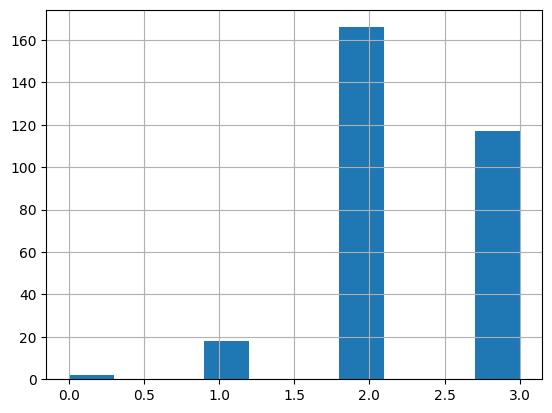

In [ ]:
df['thal'].hist()

<Axes: >

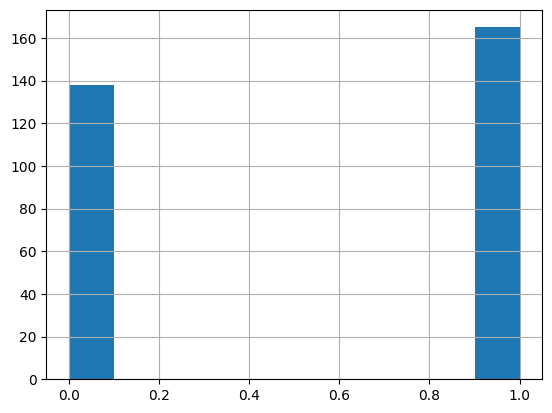

In [ ]:
df['output'].hist()

<ipython-input-31-58225331bb92>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='output',data=df,palette='RdBu_r')


<Axes: xlabel='output', ylabel='count'>

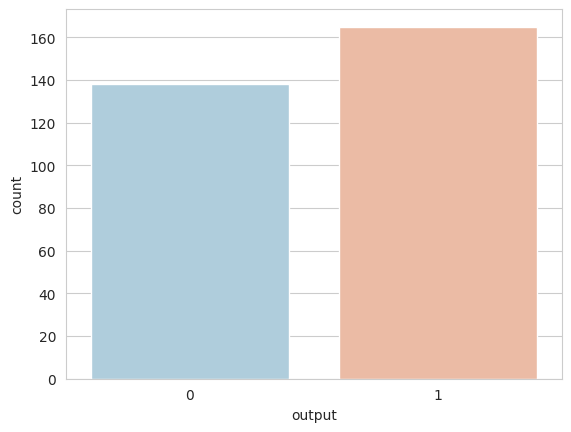

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='output',data=df,palette='RdBu_r')

In [ ]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trtbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
y = df['output']
X = df.drop(['output'], axis = 1)

### **K Nearest Neighbour**

In [ ]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

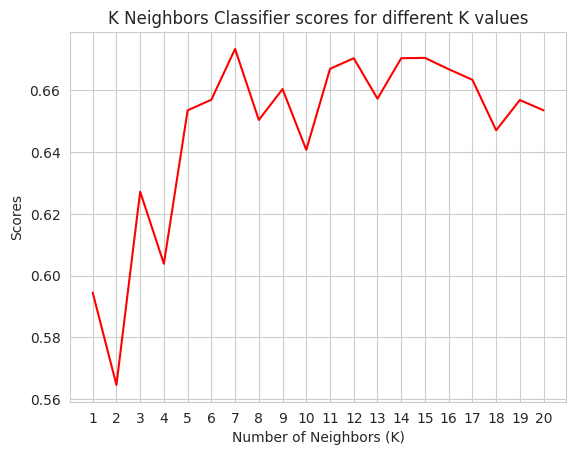

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [ ]:
score.mean()

0.6704301075268817

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [ ]:
score.mean()

0.7918279569892474

Mean

KNN: 0.6704

Random Forest: 0.7918

# **Parkinson Disease Prediction**

Parkinson’s disease is a central nervous system disorder. Its symptoms occur because of low dopamine levels in the brain. Four Primary symptoms are tremor, rigidity, slow movement and balance problems. Till now no cure for Parkinson’s Disease is known, treatment aims to reduce the effects of the symptoms.

**Import Libraries**

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**Import Dataset**

In [62]:
df=pd.read_csv("parkinsons.csv")

Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR, HNR - Two measures of the ratio of noise to tonal components in the voice

status - The health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE, D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [63]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [64]:
df.shape

(195, 24)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [66]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [67]:
df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [68]:
df['status'].value_counts()

,count
status,
1,147
0,48


'1'-> Parkinson's Positive

'0'-> Parkinson's Negative

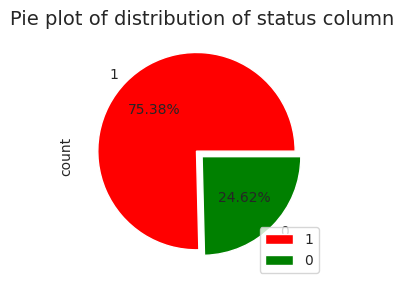

In [76]:
explode=(0.08,0)
df['status'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(3,3),explode=explode,colors=['red','green'])
plt.title("Pie plot of distribution of status column", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

In [77]:
X = df.drop(columns=['name','status'], axis=1)
Y = df['status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

**SVM Model (Support Vector Machine)**

In [78]:
model = svm.SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(kernel='linear')

**Model Evaluation By Checking Accuracy Score**

In [83]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [84]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8717948717948718


In [85]:
# accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [86]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


Support Vector Machine

Train Data Accuracy: 0.8717

Test Data Accuracy: 0.8717